### Treść zadania

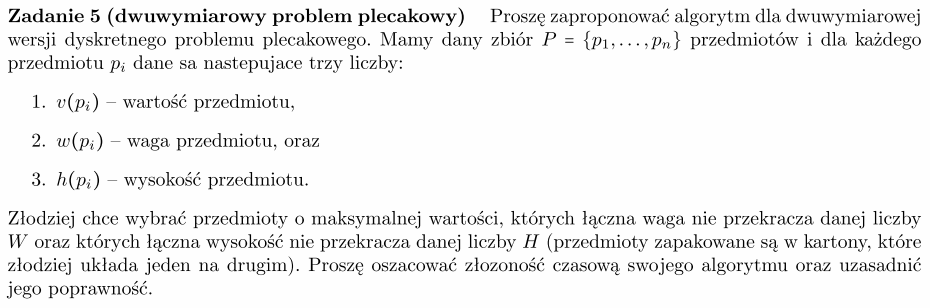

# Sposób I
### (O większej złożoności pamięciowej)

### Omówienie algorytmu

Problem bardzo podobny do zwykłego problemu plecakowego wyłącznie z jednym czynnikiem ograniczającym. W bardzo analogiczny sposób możemy rozwiązać ten problem dla dowolnej liczby ograniczeń, które rosną liniowo (tzn. nie zależą od rozmieszczenia przedmiotów w plecaku - zakładamy, że kładziemy przedmioty jeden na drugim, a wysokość plecaka jest stała). Musimy jednakże, wykorzystując koncepcje, poznane w problemie plecakowym, uwzględnić wszystkie czynniki ograniczające, a więc wypełniać tak $ 3 $-wymiarową tablicę maksymalnych profitów dla każdej kolejnej komórki $ F[i][h][w] $ (gdzie $ i $ - indeks ostatniego przedmiotu, jaki w danym momencie możemy wziąć (wybieramy najbardziej opłacalne przedmioty spośród tych o indeksach $ 0, 1, 2, ..., i - 1, i $), $ h $ - maksymalna rozważana w danym momencie wysokość plecaka, $ w $ - maksymalna rozważana w danym momencie waga (bardziej prawidłowo: masa) plecaka, znalazła się w niej wartość nawiększego profitu, jaki uzyskamy przy opidanych wcześniej założeniach na $ i $, $ h $ oraz $ w $.
<br><br>
Ponownie dla pierwszego przedmiotu wypełniamy pierwszy poziom tablicy $ F $ wartościami jego profitu w tych komórkach, dla których zachodzi warunek $ H[0] \le h $ oraz $ W[0] \le w $ (innymi słowy, przedmiot mieści się w plecaku, uwzględniając wszystkie ograniczenia). <br>
W analogiczny sposób jak dla problemu plecaka $ 1 $-wymiarowego, wypełniamy pozostałe komórki tablicy.

### Złożoność

###### Obliczeniowa:
$ O(n^3) $
###### Pamięciowa:
$ O(n^3) $

### Implementacja

In [1]:
def filter_items(H, W, MaxH, MaxW):
    """
    This function filters items which have wrong values (e.g. negative)
    or cannot fit in the knapsack even if they are used separately (that means
    an item is to tall and too heavy to be put in a knapsack).
    """
    # We assume that we got the same number of heights as weights and profits
    # (number of items is valid)
    n = len(H)
    H_cp = []
    W_cp = []
    for i in range(n):
        if 0 < H[i] <= MaxH or 0 < W[i] <= MaxW:
            H_cp.append(H[i])
            W_cp.append(W[i])
    return H_cp, W_cp


def create_arr(k: 'number of layers', i: 'number of rows', j: 'number of columns', val=0):
    return [[[val] * j for _ in range(i)] for _ in range(k)]


def knapsack2D(P: 'array of profits', 
               H: 'array of heights', 
               W: 'array of weights', 
               MaxH: 'max total height of items',
               MaxW: 'max total weight of items'
               ):
    n = len(P)
    H, W = filter_items(H, W, MaxH, MaxW)
    # Create an array for caching values
    F = create_arr(n, MaxH + 1, MaxW + 1)
    
    for h in range(H[0], MaxH + 1):
        for w in range(W[0], MaxW + 1):
            F[0][h][w] = P[0]
            
    for i in range(1, n):
        for h in range(1, MaxH + 1):
            for w in range(1, MaxW + 1):
                F[i][h][w] = F[i - 1][h][w]
                
                if H[i] <= h and W[i] <= w:
                    F[i][h][w] = max(F[i][h][w], F[i - 1][h - H[i]][w - W[i]] + P[i])
                
    print_F(F)
    
    return F[n - 1][MaxH][MaxW]
    
            
def print_F(F):
    for i, layer in enumerate(F):
        print(f'\nLayer for item #{i}:')
        print(*layer, sep='\n')

###### Kilka testów

In [2]:
P = [4, 10, 2, 3, 8]
W = [10, 4, 1, 2, 6]
H = [3, 9, 12, 4, 2]

MaxW = 12
MaxH = 20

print(knapsack2D(P, H, W, MaxH, MaxW))


Layer for item #0:
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 4, 4]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 4, 4]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 4, 4]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 4, 4]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 4, 4]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 4, 4]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 4, 4]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 4, 4]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 4, 4]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 4, 4]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 4, 4]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 4, 4]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 4, 4]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 4, 4]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 4, 4]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 4, 4]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 4, 4]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 4, 4]

Layer for item #1:
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


### (Dodatkowo) Pobieranie rozwiązania
##### (Rekurencyjnie)

Do funknkcji $ knapsack2D $ wprowadzamy jedynie drobną modyfikację, polegającą na tym, że funkcja ta zwraca dodatkowo tablicę $ F $.

In [3]:
def filter_items(H, W, MaxH, MaxW):
    """
    This function filters items which have wrong values (e.g. negative)
    or cannot fit in the knapsack even if they are used separately (that means
    an item is to tall and to heavy to be put in a knapsack).
    """
    # We assume that we got the same number of heights as weights and profits
    # (number of items is valid)
    n = len(H)
    H_cp = []
    W_cp = []
    for i in range(n):
        if 0 < H[i] <= MaxH or 0 < W[i] <= MaxW:
            H_cp.append(H[i])
            W_cp.append(W[i])
    return H_cp, W_cp


def create_arr(k: 'number of layers', i: 'number of rows', j: 'number of columns', val=0):
    return [[[val] * j for _ in range(i)] for _ in range(k)]


def knapsack2D(P: 'array of profits', 
               H: 'array of heights', 
               W: 'array of weights', 
               MaxH: 'max total height of items',
               MaxW: 'max total weight of items'
               ):
    n = len(P)
    H, W = filter_items(H, W, MaxH, MaxW)
    # Create an array for caching values
    F = create_arr(n, MaxH + 1, MaxW + 1)
    
    for h in range(H[0], MaxH + 1):
        for w in range(W[0], MaxW + 1):
            F[0][h][w] = P[0]
            
    for i in range(1, n):
        for h in range(1, MaxH + 1):
            for w in range(1, MaxW + 1):
                F[i][h][w] = F[i - 1][h][w]
                
                if H[i] <= h and W[i] <= w:
                    F[i][h][w] = max(F[i][h][w], F[i - 1][h - H[i]][w - W[i]] + P[i])
    
    return F[n - 1][MaxH][MaxW], F


def get_contents(F: '3D array returned by the knapsack function',
                 P: 'array of profits', 
                 H: 'array of heights', 
                 W: 'array of weights',
                 MaxH: 'max total height of items',
                 MaxW: 'max total weight of items'
                 ):
    
    def recur(i, h, w):
        if i < 0: return []
        if i == 0: return [0] if h >= H[0] and w >= W[0] else []
        if h >= H[i] and w >= W[i] and F[i][h][w] == F[i - 1][h - H[i]][w - W[i]] + P[i]:
            return recur(i - 1, h - H[i], w - W[i]) + [i]
        return recur(i - 1, h, w)
    
    return recur(len(P) - 1, MaxH, MaxW)

###### Kilka testów

In [4]:
P = [4, 10, 2, 3, 8]
W = [10, 6, 1, 2, 6]
H = [3, 9, 12, 4, 9]

MaxW = 12
MaxH = 20

profit, F = knapsack2D(P, H, W, MaxH, MaxW)
contents = get_contents(F, P, H, W, MaxH, MaxW)
print('Max profit:', profit)
print('Contents indices:', contents)
print('Heights sum:', sum(H[i] for i in contents))
print('Weights sum:', sum(W[i] for i in contents))

Max profit: 18
Contents indices: [1, 4]
Heights sum: 18
Weights sum: 12


### (Dodatkowo) Pobieranie rozwiązania
##### (Iteracyjnie)

In [5]:
def filter_items(H, W, MaxH, MaxW):
    """
    This function filters items which have wrong values (e.g. negative)
    or cannot fit in the knapsack even if they are used separately (that means
    an item is to tall and to heavy to be put in a knapsack).
    """
    # We assume that we got the same number of heights as weights and profits
    # (number of items is valid)
    n = len(H)
    H_cp = []
    W_cp = []
    for i in range(n):
        if 0 < H[i] <= MaxH or 0 < W[i] <= MaxW:
            H_cp.append(H[i])
            W_cp.append(W[i])
    return H_cp, W_cp


def create_arr(k: 'number of layers', i: 'number of rows', j: 'number of columns', val=0):
    return [[[val] * j for _ in range(i)] for _ in range(k)]


def knapsack2D(P: 'array of profits', 
               H: 'array of heights', 
               W: 'array of weights', 
               MaxH: 'max total height of items',
               MaxW: 'max total weight of items'
               ):
    n = len(P)
    H, W = filter_items(H, W, MaxH, MaxW)
    # Create an array for caching values
    F = create_arr(n, MaxH + 1, MaxW + 1)
    
    for h in range(H[0], MaxH + 1):
        for w in range(W[0], MaxW + 1):
            F[0][h][w] = P[0]
            
    for i in range(1, n):
        for h in range(1, MaxH + 1):
            for w in range(1, MaxW + 1):
                F[i][h][w] = F[i - 1][h][w]
                
                if H[i] <= h and W[i] <= w:
                    F[i][h][w] = max(F[i][h][w], F[i - 1][h - H[i]][w - W[i]] + P[i])
    
    return F[n - 1][MaxH][MaxW], F


def get_contents(F: '3D array returned by the knapsack function',
                 P: 'array of profits', 
                 H: 'array of heights', 
                 W: 'array of weights',
                 ):
    n = len(F)
    h = len(F[0]) - 1
    w = len(F[0][0]) - 1
    contents = []
    
    for i in range(n - 1, 0, -1):
        # If we have taken an item from the 'i'th layer, a profit stored
        # in this layer will be different than a profit in a layer before
        if F[i][h][w] != F[i - 1][h][w]:
            contents.append(i)
            w -= W[i]
            h -= H[i]
    # As we will never check the first row in a loop above, we have
    # to asses whether the item from the first layer was taken separately
    # We decide to take the first element only if the remaining weight
    # and the remaining height that can be used are no lower than 
    # a weight of this element and a height of this element
    if w >= W[0] and h >= H[0]:
        contents.append(0)
        
    contents.reverse()
    return contents

###### Kilka testów

In [6]:
P = [4, 10, 2, 3, 8]
W = [10, 6, 1, 2, 6]
H = [3, 9, 12, 4, 9]

MaxW = 12
MaxH = 20

profit, F = knapsack2D(P, H, W, MaxH, MaxW)
contents = get_contents(F, P, H, W)
print('Max profit:', profit)
print('Contents indices:', contents)
print('Heights sum:', sum(H[i] for i in contents))
print('Weights sum:', sum(W[i] for i in contents))

Max profit: 18
Contents indices: [1, 4]
Heights sum: 18
Weights sum: 12


# Sposób #2
### (O mniejszej złożoności pamięciowej)

### Omówienie algorytmu

Idea identyczna jak wyżej, ale tym razem korzystamy z $ 2 $-wymiarowej tablicy na wartości. Podobne podejście zostało przedstawione m.in. <a href="../../../Pozostałe zadania/Zadania BIT Algo/9. Zajęcia/Zadanie 6. (Pakowanie bagaży - zwykła algorytm na sumę podzbioru z użyciem plecakowego).ipynb">TUTAJ</a>

### Złożoność

###### Obliczeniowa:
$ O(n^3) $
###### Pamięciowa:
$ O(n^2) $

### Implementacja

In [7]:
def filter_items(H, W, MaxH, MaxW):
    """
    This function filters items which have wrong values (e.g. negative)
    or cannot fit in the knapsack even if they are used separately (that means
    an item is to tall and too heavy to be put in a knapsack).
    """
    # We assume that we got the same number of heights as weights and profits
    # (number of items is valid)
    n = len(H)
    H_cp = []
    W_cp = []
    for i in range(n):
        if 0 < H[i] <= MaxH or 0 < W[i] <= MaxW:
            H_cp.append(H[i])
            W_cp.append(W[i])
    return H_cp, W_cp


def knapsack2D(P: 'array of profits', 
               H: 'array of heights', 
               W: 'array of weights', 
               MaxH: 'max total height of items',
               MaxW: 'max total weight of items'
               ):
    n = len(P)
    H, W = filter_items(H, W, MaxH, MaxW)
    # Create an array for caching values
    F = [[0] * (MaxW + 1) for _ in range(MaxH + 1)]
    
    for h in range(H[0], MaxH + 1):
        for w in range(W[0], MaxW + 1):
            F[h][w] = P[0]
            
    for i in range(1, n):
        for h in range(MaxH, -1, -1):
            for w in range(MaxW, -1, -1):
                if H[i] <= h and W[i] <= w:
                    F[h][w] = max(F[h][w], F[h - H[i]][w - W[i]] + P[i])
                
    print(*F, sep='\n')
    
    return F[MaxH][MaxW]

###### Kilka testów

In [8]:
P = [4, 10, 2, 3, 8]
W = [10, 4, 1, 2, 6]
H = [3, 9, 12, 4, 2]

MaxW = 12
MaxH = 20

print(knapsack2D(P, H, W, MaxH, MaxW))

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 8, 8, 8, 8, 8, 8, 8]
[0, 0, 0, 0, 0, 0, 8, 8, 8, 8, 8, 8, 8]
[0, 0, 3, 3, 3, 3, 8, 8, 8, 8, 8, 8, 8]
[0, 0, 3, 3, 3, 3, 8, 8, 8, 8, 8, 8, 8]
[0, 0, 3, 3, 3, 3, 8, 8, 11, 11, 11, 11, 11]
[0, 0, 3, 3, 3, 3, 8, 8, 11, 11, 11, 11, 11]
[0, 0, 3, 3, 3, 3, 8, 8, 11, 11, 11, 11, 11]
[0, 0, 3, 3, 10, 10, 10, 10, 11, 11, 11, 11, 11]
[0, 0, 3, 3, 10, 10, 10, 10, 11, 11, 11, 11, 11]
[0, 0, 3, 3, 10, 10, 10, 10, 11, 11, 18, 18, 18]
[0, 2, 3, 3, 10, 10, 10, 10, 11, 11, 18, 18, 18]
[0, 2, 3, 3, 10, 10, 13, 13, 13, 13, 18, 18, 18]
[0, 2, 3, 3, 10, 10, 13, 13, 13, 13, 18, 18, 18]
[0, 2, 3, 3, 10, 10, 13, 13, 13, 13, 18, 18, 21]
[0, 2, 3, 5, 10, 10, 13, 13, 13, 13, 18, 18, 21]
[0, 2, 3, 5, 10, 10, 13, 13, 13, 13, 18, 18, 21]
[0, 2, 3, 5, 10, 10, 13, 13, 13, 13, 18, 18, 21]
[0, 2, 3, 5, 10, 10, 13, 13, 13, 13, 18, 18, 21]
[0, 2, 3, 5, 10, 10, 13, 13, 13, 13, 18, 18, 21]
21


###### UWAGA
W przypadku pracy na macierzy $ 2 $-wymiarowej, odtwarzanie rozwiązania jest niemożliwe (chyba, że byśmy utworzyli macierz $ 3 $-wymiarową do zapamiętywania, z jakiego zestawu poprzednio skorzystaliśmy), ponieważ tracimy całą informację o rozwiązaniu dla $ i - 1 $ (dla poprzednio rozważanego zestawu przedmiotów z pominięciem obecnie ostatniego).